# 🔬 Analysis 
### Dataset: Loyalty program (`loyalty_program.csv`) 
**Objective:** Identifying trends and patterns.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None) 

df_loyalty= pd.read_csv('../data/processed/loyalty_program.csv')

df_loyalty.head()

,Unnamed: 0,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,1,100102,2017,1,10,4,14,2030,203.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,2,100140,2017,1,6,0,6,1200,120.0,0,0,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,3,100214,2017,1,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,4,100272,2017,1,0,0,0,0,0.0,0,0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [41]:
df_loyalty.isna().sum()/df_loyalty.shape[0]*100

Unnamed: 0                      0.000000
Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.326927
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.703091
Cancellation Mon

### Distribution of flight reservations per month throughout the year

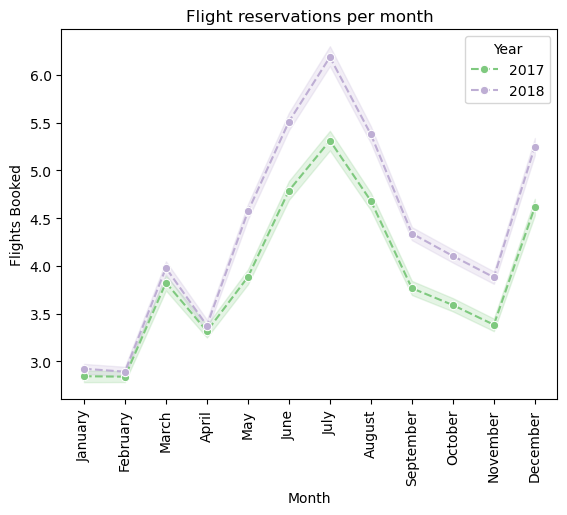

In [37]:
sns.lineplot(y= 'Flights Booked',
            x = 'Month', 
            data = df_loyalty, 
            marker='o',
            hue='Year',
            palette='Accent',
            color = 'cadetblue',
            linestyle='dashed')

plt.xticks(ticks=range(1,13),labels=[
    "January", 
    "February", 
    "March", 
    "April", 
    "May", 
    "June", 
    "July", 
    "August", 
    "September", 
    "October", 
    "November", 
    "December"
], rotation=90)

plt.title('Flight reservations per month');


### Relationship between flight distance and loyalty points accumulated by customers

In [5]:
df_loyalty[['Distance', 'Points Accumulated']].corr()

,Distance,Points Accumulated
Distance,1.000000,0.994546
Points Accumulated,0.994546,1.000000


In [16]:
df_points = df_loyalty[(df_loyalty['Points Accumulated'] > 0) & (df_loyalty['Distance'] > 0)]

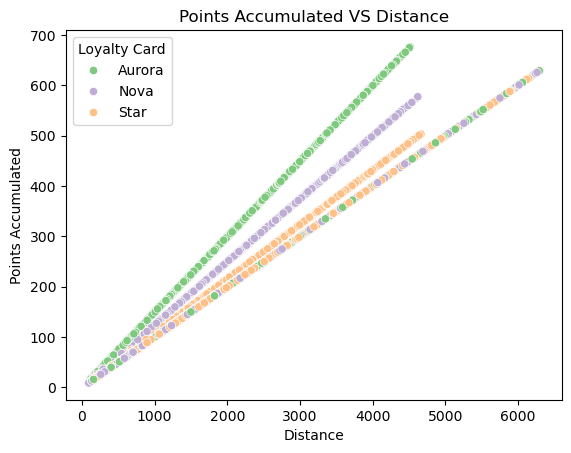

In [40]:
sns.scatterplot(x = 'Distance', 
                y = 'Points Accumulated', 
                data = df_points,
                hue='Loyalty Card',
                palette='Accent'
                )

plt.title('Points Accumulated VS Distance');

### Geographical distribution of customers by province or state

In [45]:
customers_state = df_loyalty.groupby('Province')['Loyalty Number'].nunique().reset_index() #counts customers only once.

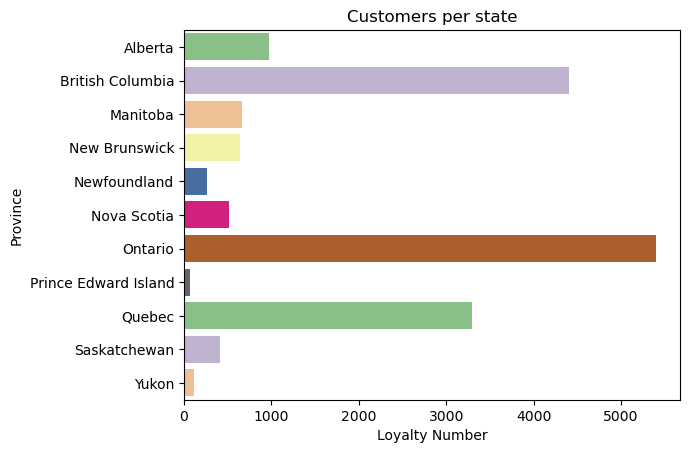

In [48]:
sns.barplot(y = 'Province', 
            x = 'Loyalty Number', 
            data = customers_state, 
            palette = 'Accent')

plt.title('Customers per state');



### Average salary across different educational levels of customers